<a href="https://colab.research.google.com/github/auriwan/911-emergency-call-analysis/blob/main/911_calls_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Emergency calls

Pada Projek kali ini akan dilakukan analisis data 911 emergency calls dari kaggle
[Emergency 911 calls](https://www.kaggle.com/datasets/mchirico/montcoalert)

overview data:
- lat: String, Latitude
- lng: String, Longitude
- desc: String, Deskripsi dari emergency call
- zip: String, Zipcode/kodepos
- title: String, Title
- timeStamps: String, YYYY-MM-DD HH:MM:SS
- twp: String, Township
- addr: String, Address
- e: String, Dummy variabel(selalu 1)

# Setup Data

In [72]:
import numpy as np
import pandas as pd
import os
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## _Kaggle Setup_

In [ ]:
!pip install -q kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content/"

upload file kaggle.json

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"auriwanyasper","key":"1f2aa275cf7e43b60dd6dbd14361b24b"}'}

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content kaggle datasets download -d mchirico/montcoalert

 83% 20.0M/24.2M [00:00<00:00, 41.0MB/s]
100% 24.2M/24.2M [00:00<00:00, 43.6MB/s]


## Data Loading

In [ ]:
zip_ref = zipfile.ZipFile('/content/montcoalert.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## Data Understanding

In [ ]:
df=pd.read_csv('/content/911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


_Top 5 zipcode for 911 calls_

In [ ]:
df.zip.value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

_Top 5 township for 911 calls_

In [ ]:
df.twp.value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

_Unique code in the title column_

In [ ]:
df.title.nunique()

148

### Menambah fitur baru reason

Selanjutnya terdapat fitur yang perlu dipisahkan dari data title yaitu penyebabmya

In [ ]:
reason = df['title'].apply(lambda x: x.split(': '))
list_reason = reason.tolist()
s_reason = reason.apply(lambda x: x[0], list_reason)
df['Reason']=s_reason
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


_Most Reason_

In [ ]:
df.Reason.value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### CountPlot Reason

countplot untuk reason

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


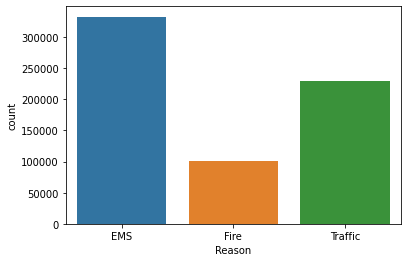

In [ ]:
sns.countplot(df['Reason'])

### Time Information

Pertama lihat tipe data pada timeStamp

In [ ]:
type(df.timeStamp[0])

str

karena masih dalam bentuk string maka kita akan ubah menjadi datatime dengan pd.datetime()

In [ ]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [ ]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

Selanjutnya kita akan pisahkan antara jam, hari per minggu, dan bulan kedalam kolom tersendiri

In [59]:
dmap = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun',
}
day_of_week = lambda x: df['timeStamp'].iloc[x].dayofweek
day_in_week = list(map(day_of_week,list(df.index)))

week = lambda x: dmap[day_in_week[x]]
day = list(map(week,list(df.index)))

In [63]:
df['Day of Week'] = pd.Series(day)

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


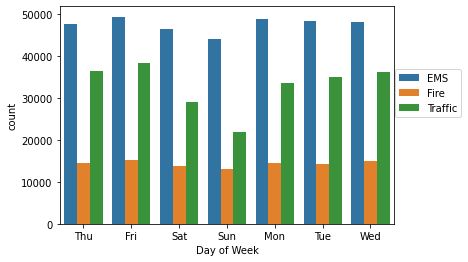

In [88]:
sns.countplot(df['Day of Week'],hue=df['Reason'])
plt.legend(loc=10, bbox_to_anchor=(1.1,0.6))

Selanjutnya Bulan

In [92]:
bulan_lmb=lambda x: df['timeStamp'][x].month
list_bulan = list(map(bulan_lmb,list(df.index)))
df['Month']=pd.Series(list_bulan)

In [93]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


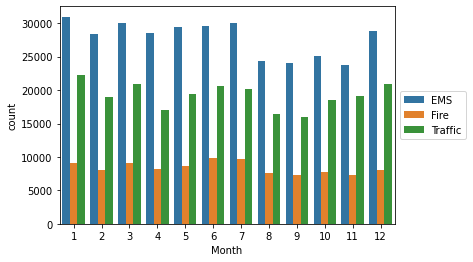

In [146]:
sns.countplot(df['Month'], hue=df['Reason'])
plt.legend(loc=6,bbox_to_anchor=(1.0,0.5))

analisis bulan

In [120]:
df_grup=df.groupby(df['Month']).count()
df_grup

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week
Month,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213


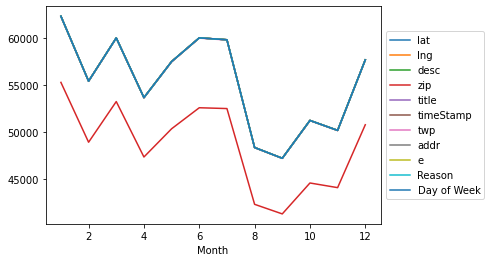

In [119]:
df_grup.plot.line()
plt.legend(loc=6,bbox_to_anchor=(1.0,0.5))

In [129]:
df_baru=df_grup.reset_index()

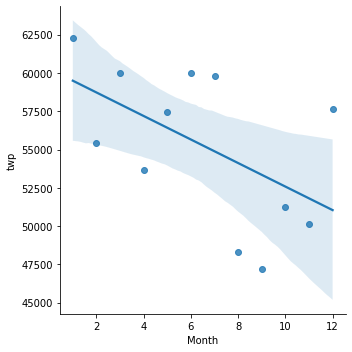

In [145]:
sns.lmplot(data=df_baru,x='Month',y='twp')

In [137]:
lmb_date = lambda x: df['timeStamp'][x].date()
date_list = list(map(lmb_date,list(df.index)))
df['Date']=pd.Series(date_list)

In [138]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,2015-12-10


plot Group date

In [219]:
df_group=df.groupby('Date').count()

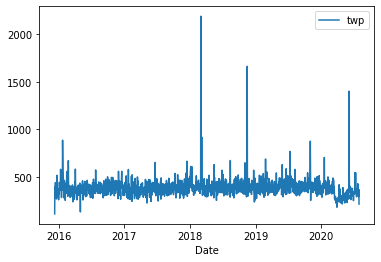

In [220]:
df_group.plot.line(y='twp')

In [209]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

In [230]:
df_new = df.set_index(['Reason','Date']).sort_index()
df_new

lat        lng  \
Reason  Date                               
EMS     2015-12-10  40.297876 -75.581294   
        2015-12-10  40.258061 -75.264680   
        2015-12-10  40.116153 -75.343513   
        2015-12-10  40.251492 -75.603350   
        2015-12-10  40.253473 -75.283245   
...                       ...        ...   
Traffic 2020-07-29  40.097222 -75.376195   
        2020-07-29  40.085847 -75.402226   
        2020-07-29  40.097222 -75.376195   
        2020-07-29  40.157956 -75.348060   
        2020-07-29  40.015046 -75.299674   

                                                                 desc  \
Reason  Date                                                            
EMS     2015-12-10  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
        2015-12-10  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
        2015-12-10  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
        2015-12-10  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
        2015-12-10  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
...                                                               ...   
Traffic 2020-07-29  RAMP RT202 NB TO RT422  & RT202 NB; UPPER MERI...   
        2020-07-29  VILLAGE DR & N GULPH RD; UPPER MERION; 2020-07...   
        2020-07-29  RAMP RT202 NB TO RT422  & RT202 NB; UPPER MERI...   
        2020-07-29  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...   
        2020-07-29  HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...   

                        zip                        title           timeStamp  \
Reason  Date                                                                   
EMS     2015-12-10  19525.0       EMS: BACK PAINS/INJURY 2015-12-10 17:10:52   
        2015-12-10  19446.0      EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21   
        2015-12-10  19401.0       EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36   
        2015-12-10      NaN               EMS: DIZZINESS 2015-12-10 16:56:52   
        2015-12-10  19446.0             EMS: HEAD INJURY 2015-12-10 15:39:04   
...                     ...                          ...                 ...   
Traffic 2020-07-29      NaN      Traffic: VEHICLE FIRE - 2020-07-29 15:34:11   
        2020-07-29  19406.0      Traffic: VEHICLE FIRE - 2020-07-29 15:35:33   
        2020-07-29      NaN      Traffic: VEHICLE FIRE - 2020-07-29 15:32:29   
        2020-07-29  19403.0  Traffic: VEHICLE ACCIDENT - 2020-07-29 15:46:51   
        2020-07-29  19041.0  Traffic: VEHICLE ACCIDENT - 2020-07-29 15:52:46   

                                  twp  \
Reason  Date                            
EMS     2015-12-10        NEW HANOVER   
        2015-12-10  HATFIELD TOWNSHIP   
        2015-12-10         NORRISTOWN   
        2015-12-10   LOWER POTTSGROVE   
        2015-12-10           LANSDALE   
...                               ...   
Traffic 2020-07-29       UPPER MERION   
        2020-07-29       UPPER MERION   
        2020-07-29       UPPER MERION   
        2020-07-29      EAST NORRITON   
        2020-07-29       LOWER MERION   

                                                       addr  e Day of Week  \
Reason  Date                                                                 
EMS     2015-12-10                   REINDEER CT & DEAD END  1         Thu   
        2015-12-10               BRIAR PATH & WHITEMARSH LN  1         Thu   
        2015-12-10                       AIRY ST & SWEDE ST  1         Thu   
        2015-12-10                 CHERRYWOOD CT & DEAD END  1         Thu   
        2015-12-10                    CANNON AVE & W 9TH ST  1         Thu   
...                                                     ... ..         ...   
Traffic 2020-07-29       RAMP RT202 NB TO RT422  & RT202 NB  1         Wed   
        2020-07-29                  VILLAGE DR & N GULPH RD  1         Wed   
        2020-07-29       RAMP RT202 NB TO RT422  & RT202 NB  1         Wed   
        2020-07-29                SUNSET AVE & WOODLAND AVE  1        

plot EMS

In [236]:
df_EMS=df_new.xs('EMS')


In [237]:
plot_ems=df_EMS.groupby('Date').count()

Text(0.5, 1.0, 'EMS')

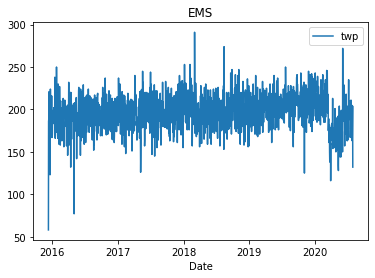

In [238]:
plot_ems.plot.line(y='twp')
plt.title('EMS')

plot Traffic

In [239]:
df_trafic=df_new.xs('Traffic')

In [240]:
plot_traffic=df_trafic.groupby('Date').count()

Text(0.5, 1.0, 'Traffic')

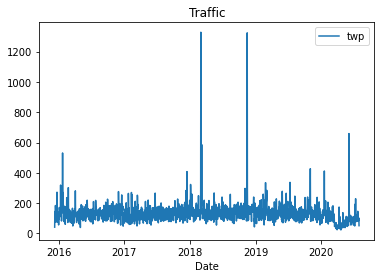

In [241]:
plot_traffic.plot.line(y='twp')
plt.title('Traffic')

plot Fire

In [242]:
df_fire=df_new.xs('Fire')

In [243]:
plot_fire = df_fire.groupby('Date').count()

Text(0.5, 1.0, 'Fire')

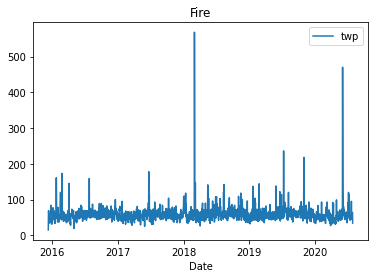

In [244]:
plot_fire.plot.line(y='twp')
plt.title('Fire')

In [248]:
lmd_hour=lambda x: df['timeStamp'][x].hour
list_hour=list(map(lmd_hour,list(df.index)))
hour=pd.Series(list_hour)
df['Hour']=hour

In [249]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,2015-12-10,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,2015-12-10,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,2015-12-10,16


In [284]:
df_idx_hour_week=df.groupby(['Day of Week','Hour']).pipe(lambda grp: grp.Hour.count()).unstack()

In [285]:
df_idx_hour_week

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


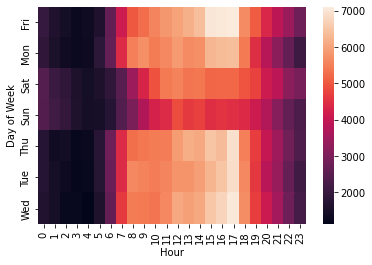

In [286]:
sns.heatmap(df_idx_hour_week)

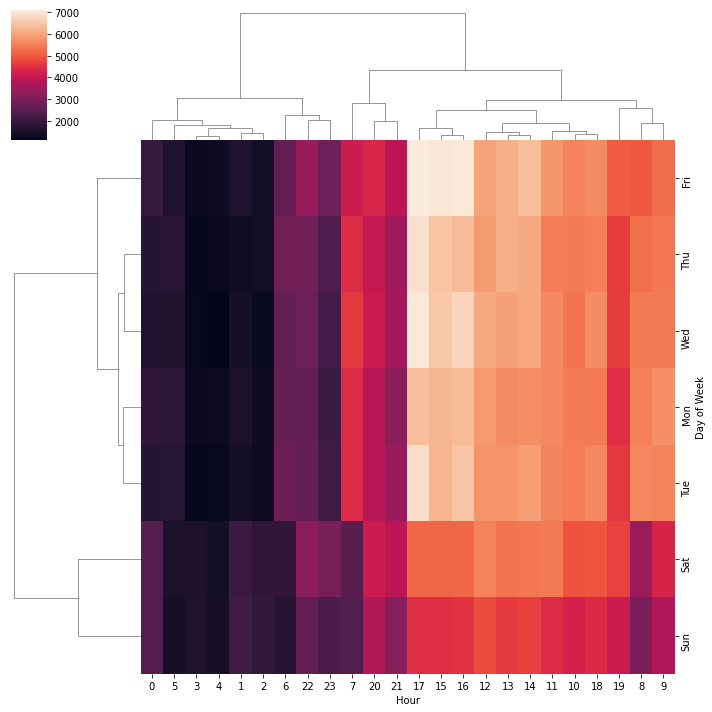

In [287]:
sns.clustermap(df_idx_hour_week)

In [289]:
df_idx_month_week=df.groupby(['Day of Week','Month']).pipe(lambda grp: grp.Month.count()).unstack('Month')

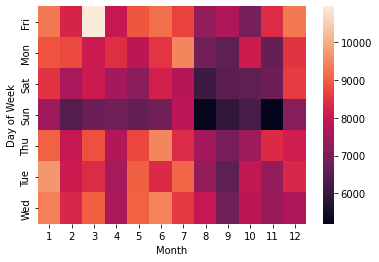

In [291]:
sns.heatmap(df_idx_month_week)

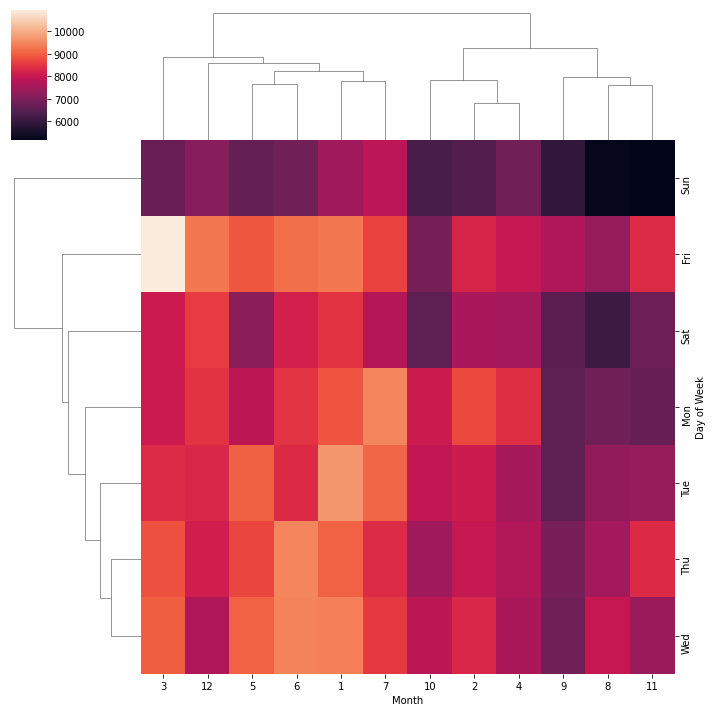

In [292]:
sns.clustermap(df_idx_month_week)